In [1]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí
html_content = """
<h1 style="text-align: center; color: #2a9d8f; font-size: 48px;">💼 Báo cáo cuối kỳ 💰</h1>
<h2 style="text-align: center; color: #264653; font-size: 36px;">🤖 Dự đoán lương bằng Model AI 🤖</h2>
<hr style="border: 2px solid #e76f51; margin: 20px 0;">
<p style="text-align: center; font-size: 24px; color: #1d3557;">Phân tích dữ liệu và ứng dụng machine learning models để tối ưu hóa dự đoán lương.</p>
"""

# Hiển thị HTML
display(HTML(html_content))


In [2]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí cho mục lục với liên kết nội bộ
html_content = """
<h2 style="text-align: left; color: #2a9d8f; font-size: 28px; font-weight: bold;">📑 Mục lục</h2>
<ul style="font-size: 18px; color: #1d3557; list-style-type: none; padding-left: 20px;">
    <li style="margin: 10px 0;"><a href="#step1" style="color: #1d3557; text-decoration: none;"><strong>🔹 Bước 1: Chạy tất cả model</strong></a></li>
    <li style="margin: 10px 0;"><a href="#step2" style="color: #1d3557; text-decoration: none;"><strong>🔹 Bước 2: Vẽ biểu đồ so sánh hiệu suất</strong></a></li>
    <li style="margin: 10px 0;"><a href="#step3" style="color: #1d3557; text-decoration: none;"><strong>🔹 Bước 3: Đánh giá bằng các thông số</strong></a></li>
    <ul style="font-size: 16px; color: #1d3557; padding-left: 40px;">
        <li>1. Chọn model tốt nhất dựa trên từng thông số riêng lẻ</li>
        <li>2. Chọn model tốt nhất dựa trên kết hợp 3 thông số</li>
        <li>Kết luận</li>
    </ul>
    <li style="margin: 10px 0;"><a href="#step4" style="color: #1d3557; text-decoration: none;"><strong>🔹 Bước 4: Tối ưu hóa cho model phù hợp nhất</strong></a></li>
    <ul style="font-size: 16px; color: #1d3557; padding-left: 40px;">
        <li>1. Tối ưu hóa tham số</li>
        <li>2. Vẽ biểu đồ dự đoán 📊🔍📈</li>
    </ul>
</ul>
"""

# Hiển thị Mục lục
display(HTML(html_content))

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, ElasticNetCV, HuberRegressor, SGDRegressor
from sklearn.linear_model import RANSACRegressor, HuberRegressor, PoissonRegressor, TweedieRegressor, Lars
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, ExtraTreesRegressor,  VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import KMeans
from sklearn.exceptions import NotFittedError
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore", category= ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
import numpy as np
#from catboost import CatBoostRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
# import h2o
# from h2o.automl import H2OAutoML
# from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# from h2o.estimators.gbm import H2OGradientBoostingEstimator
# from h2o.estimators.random_forest import H2ORandomForestEstimator
# from h2o.estimators.deeplearning import H2ODeepLearningEstimator
# # Khởi tạo H2O
# h2o.init()

In [4]:
# Nội dung Bước 1 với ID
html_step1 = """
<h2 id="step1" style="text-align: left; color: #e76f51; font-size: 28px; font-weight: bold;">🚀 Bước 1: Chạy tất cả model 🚀</h2>
<p style="text-align: left; font-size: 18px; color: #1d3557;">Tiến hành chạy toàn bộ các mô hình đã được triển khai để tiến tới dự đoán chính xác nhất.</p>
"""
display(HTML(html_step1))


In [5]:
data = pd.read_csv('dataset/Defined_salary.csv')
# Điều chỉnh hệ số IQR để loại bỏ ít ngoại lai hơn
IQR_factor = 2.8  # Hệ số IQR, tăng giá trị này để giữ lại nhiều dữ liệu hơn

# Tính toán IQR cho biến Salary
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR_factor * IQR
upper_bound = Q3 + IQR_factor * IQR

# Lọc dữ liệu để loại bỏ ít ngoại lai hơn
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]
data.columns = data.columns.str.replace(r'[\s:]', '_', regex=True)

# Dữ liệu đầu vào và nhãn đầu ra
X = data.drop('Salary', axis=1)  # Dữ liệu đầu vào (tất cả các cột trừ 'Salary')
y = data['Salary']  # Nhãn đầu ra (cột 'Salary')

# Chia tập dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#SMOTE 
def train_and_evaluate(models_dict, X_train, y_train, X_test, y_test):
    results = {}
    trained_models = {}
    for model_name, model in models_dict.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            results[model_name] = {"MAE": mae, "MSE":mse,"RMSE": rmse, "R²": r2}
            trained_models[model_name] = model  # Lưu mô hình đã huấn luyện
            print(f"{model_name}: MAE={mae}, MSE={mse}, RMSE={rmse}, R²={r2}")
        except Exception as e:
            print(f"Error in {model_name}: {e}")
    
    return results
    #return results, trained_models

In [6]:
# Các mô hình tuyến tính
linear_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "RidgeCV": RidgeCV(),
    "LARS Regression": Lars(),
    "OMP Regression": OrthogonalMatchingPursuit(),
    # "H2O Generalized Linear Model (GLM)": H2OGeneralizedLinearEstimator(),
    # "Theil-Sen Regressor": TheilSenRegressor(),
}
model_results_part_1 = train_and_evaluate(linear_models, X_train, y_train, X_test, y_test)

Linear Regression: MAE=2568790.982217586, MSE=12867931197845.506, RMSE=3587189.874796915, R²=0.5616988903879024
Ridge Regression: MAE=2565828.503150817, MSE=12851024145755.709, RMSE=3584832.512929399, R²=0.5622747700360986
Lasso Regression: MAE=2568556.2290608073, MSE=12863591511273.809, RMSE=3586584.937133625, R²=0.5618467066460483
ElasticNet Regression: MAE=2781876.033196242, MSE=14808895385084.107, RMSE=3848232.761292397, R²=0.49558672799722536
ElasticNetCV: MAE=4000764.6080645393, MSE=28872395073619.5, RMSE=5373303.925297684, R²=0.016562755631993498
RidgeCV: MAE=2560977.9022898874, MSE=12844527635365.08, RMSE=3583926.2876578644, R²=0.562496050960673
LARS Regression: MAE=1377408980486.7727, MSE=1.542626966470616e+26, RMSE=12420253485620.234, R²=-5254419694400.391
OMP Regression: MAE=2629290.935565158, MSE=13486586915489.014, RMSE=3672408.870957728, R²=0.5406265452422881


In [7]:
# Các mô hình học máy phi tuyến
non_linear_models = {
    "Support Vector Regression (SVR)": SVR(),
    "LinearSVR": LinearSVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(),
    "Gaussian Process Regressor": GaussianProcessRegressor(),
    # "H2O Deep Learning": H2ODeepLearningEstimator()
}
# Đánh giá các mô hình học máy phi tuyến
model_results_part_2 = train_and_evaluate(non_linear_models, X_train, y_train, X_test, y_test)

Support Vector Regression (SVR): MAE=3856144.7995390804, MSE=32417370711792.426, RMSE=5693625.445337305, R²=-0.1041844516595094
LinearSVR: MAE=9566238.704949649, MSE=127980759101546.02, RMSE=11312858.13141604, R²=-3.359217333443474
Decision Tree Regressor: MAE=2310575.221299749, MSE=17031371186626.87, RMSE=4126908.1873270296, R²=0.419885856200108
KNeighbors Regressor: MAE=2608478.5357737103, MSE=16213654856572.379, RMSE=4026618.2903985796, R²=0.4477385054954993
MLP Regressor: MAE=9729815.532941524, MSE=129817795522304.05, RMSE=11393761.254401641, R²=-3.421789559641799
Gaussian Process Regressor: MAE=6939920.875907701, MSE=92145338734027.48, RMSE=9599236.362025237, R²=-2.1386089645450506


In [8]:
# Các mô hình cây (tree-based models)
tree_models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor(),
    "ExtraTrees Regressor": ExtraTreesRegressor(),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor()
    # "H2O GBM": H2OGradientBoostingEstimator(),
    # "H2O Gradient Boosting Machine (GBM)": H2OGradientBoostingEstimator(),
    # "H2O Random Forest": H2ORandomForestEstimator()
}
# Đánh giá các mô hình cây (tree-based models)
model_results_part_3 = train_and_evaluate(tree_models, X_train, y_train, X_test, y_test)

Decision Tree Regressor: MAE=2359053.8812051974, MSE=17356098047347.893, RMSE=4166065.055582773, R²=0.4088251704390039
Random Forest Regressor: MAE=1890831.9818236977, MSE=9459904534259.79, RMSE=3075695.7805120763, R²=0.6777814094246326
Gradient Boosting Regressor: MAE=2352478.4148621666, MSE=11432900927185.564, RMSE=3381257.2997607803, R²=0.6105781818829106
XGBoost Regressor: MAE=2102017.75, MSE=10048943161344.0, RMSE=3170006.8077756553, R²=0.6577178239822388
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 12020, number of used features: 132
[LightGBM] [Info] Start training from score 11707381.530782


  File "c:\Users\Long\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Long\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Long\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                   

LightGBM Regressor: MAE=2150516.35121417, MSE=10081854285105.309, RMSE=3175193.582304126, R²=0.656596864548903
ExtraTrees Regressor: MAE=1879868.6002737056, MSE=10263910048544.477, RMSE=3203733.7668015542, R²=0.6503957711563595
HistGradientBoosting Regressor: MAE=2165354.251250688, MSE=10229003410828.082, RMSE=3198281.3214018685, R²=0.6515847437898534
Bagging Regressor: MAE=1995199.6560060396, MSE=10419059100682.283, RMSE=3227856.734844699, R²=0.6451111608595115


In [9]:
# Các mô hình đặc biệt
special_models = {
    "Huber Regressor": HuberRegressor(),
    "RANSAC Regressor": RANSACRegressor(),
    "Poisson Regressor": PoissonRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Bayesian Ridge Regression": BayesianRidge()
}
# Đánh giá các mô hình đặc biệt: 
model_results_part_4 = train_and_evaluate(special_models, X_train, y_train, X_test, y_test)

Huber Regressor: MAE=2652654.5883638575, MSE=14150461317057.42, RMSE=3761709.8927292917, R²=0.5180139836442577
RANSAC Regressor: MAE=3263046.335040282, MSE=20361937606801.918, RMSE=4512420.371242236, R²=0.3064417496724068
Poisson Regressor: MAE=2783590.6158036315, MSE=15218054290377.498, RMSE=3901032.4646659247, R²=0.4816501596832923
SGD Regressor: MAE=1.0408490484263662e+16, MSE=3.419649495834347e+32, RMSE=1.8492294329894132e+16, R²=-1.1647841020160227e+19
Passive Aggressive Regressor: MAE=4857976.3839038685, MSE=47287512807303.31, RMSE=6876591.6562860785, R²=-0.6106838788279756
Bayesian Ridge Regression: MAE=3999187.243214315, MSE=28858776884054.97, RMSE=5372036.567639406, R²=0.01702661167110875


In [10]:
# Các mô hình tăng cường (ensemble models)
ensemble_models = {
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    #"CatBoost Regressor": CatBoostRegressor(verbose=0),
    "Voting Regressor":  VotingRegressor(estimators=[
            ('lr', LinearRegression()),
            ('ridge', Ridge(alpha=1.0)),
            ('lasso', Lasso(alpha=0.1)),
            ('svr', SVR(C=1.0, kernel='rbf')),
            ('dt', DecisionTreeRegressor(max_depth=5)),
            ('knn', KNeighborsRegressor(n_neighbors=5))
        ]),
    "Stacking Regressor": StackingRegressor(
            estimators=[
                ('lr', LinearRegression()),
                ('ridge', Ridge(alpha=1.0)),
                ('lasso', Lasso(alpha=0.1)),
                ('svr', SVR(C=1.0, kernel='rbf')),
                ('dt', DecisionTreeRegressor(max_depth=5)),
                ('knn', KNeighborsRegressor(n_neighbors=5))
            ],
            final_estimator=LinearRegression() 
        ),
    # "H2O AutoML": H2OAutoML(max_models=10, seed=42)
}
# Đánh giá các mô hình Ensemble
model_results_part_5 = train_and_evaluate(ensemble_models, X_train, y_train, X_test, y_test)

AdaBoost Regressor: MAE=4470629.892383029, MSE=27647449489500.26, RMSE=5258084.203348237, R²=0.05828624641532887
Bagging Regressor: MAE=1993867.395482215, MSE=10488989091574.305, RMSE=3238670.883491298, R²=0.6427292400882636
Voting Regressor: MAE=2455818.8024566676, MSE=12658406842897.725, RMSE=3557865.4897139836, R²=0.5688356053619261
Stacking Regressor: MAE=2313677.9644211414, MSE=10913603172558.043, RMSE=3303574.302563519, R²=0.6282662452221381


In [11]:
# Các mô hình phân cụm
clustering_models = {
    "K-Means Clustering": KMeans()
}
# Đánh giá các mô hình Clustering
model_results_part_6 = train_and_evaluate(clustering_models, X_train, y_train, X_test, y_test)

K-Means Clustering: MAE=11748947.666222962, MSE=167396423875297.0, RMSE=12938176.991960537, R²=-4.701774216971578


In [12]:
# Nội dung Bước 2 với ID
html_step2 = """
<h2 id="step2" style="text-align: left; color: #457b9d; font-size: 28px; font-weight: bold;">📊 Bước 2: Vẽ biểu đồ so sánh hiệu suất 📊</h2>
<p style="text-align: left; font-size: 18px; color: #1d3557;">Tiến hành vẽ biểu đồ để so sánh hiệu suất của các mô hình đã chạy và đánh giá kết quả.</p>
"""
display(HTML(html_step2))



Biểu đồ dự đoán cho linear_models:


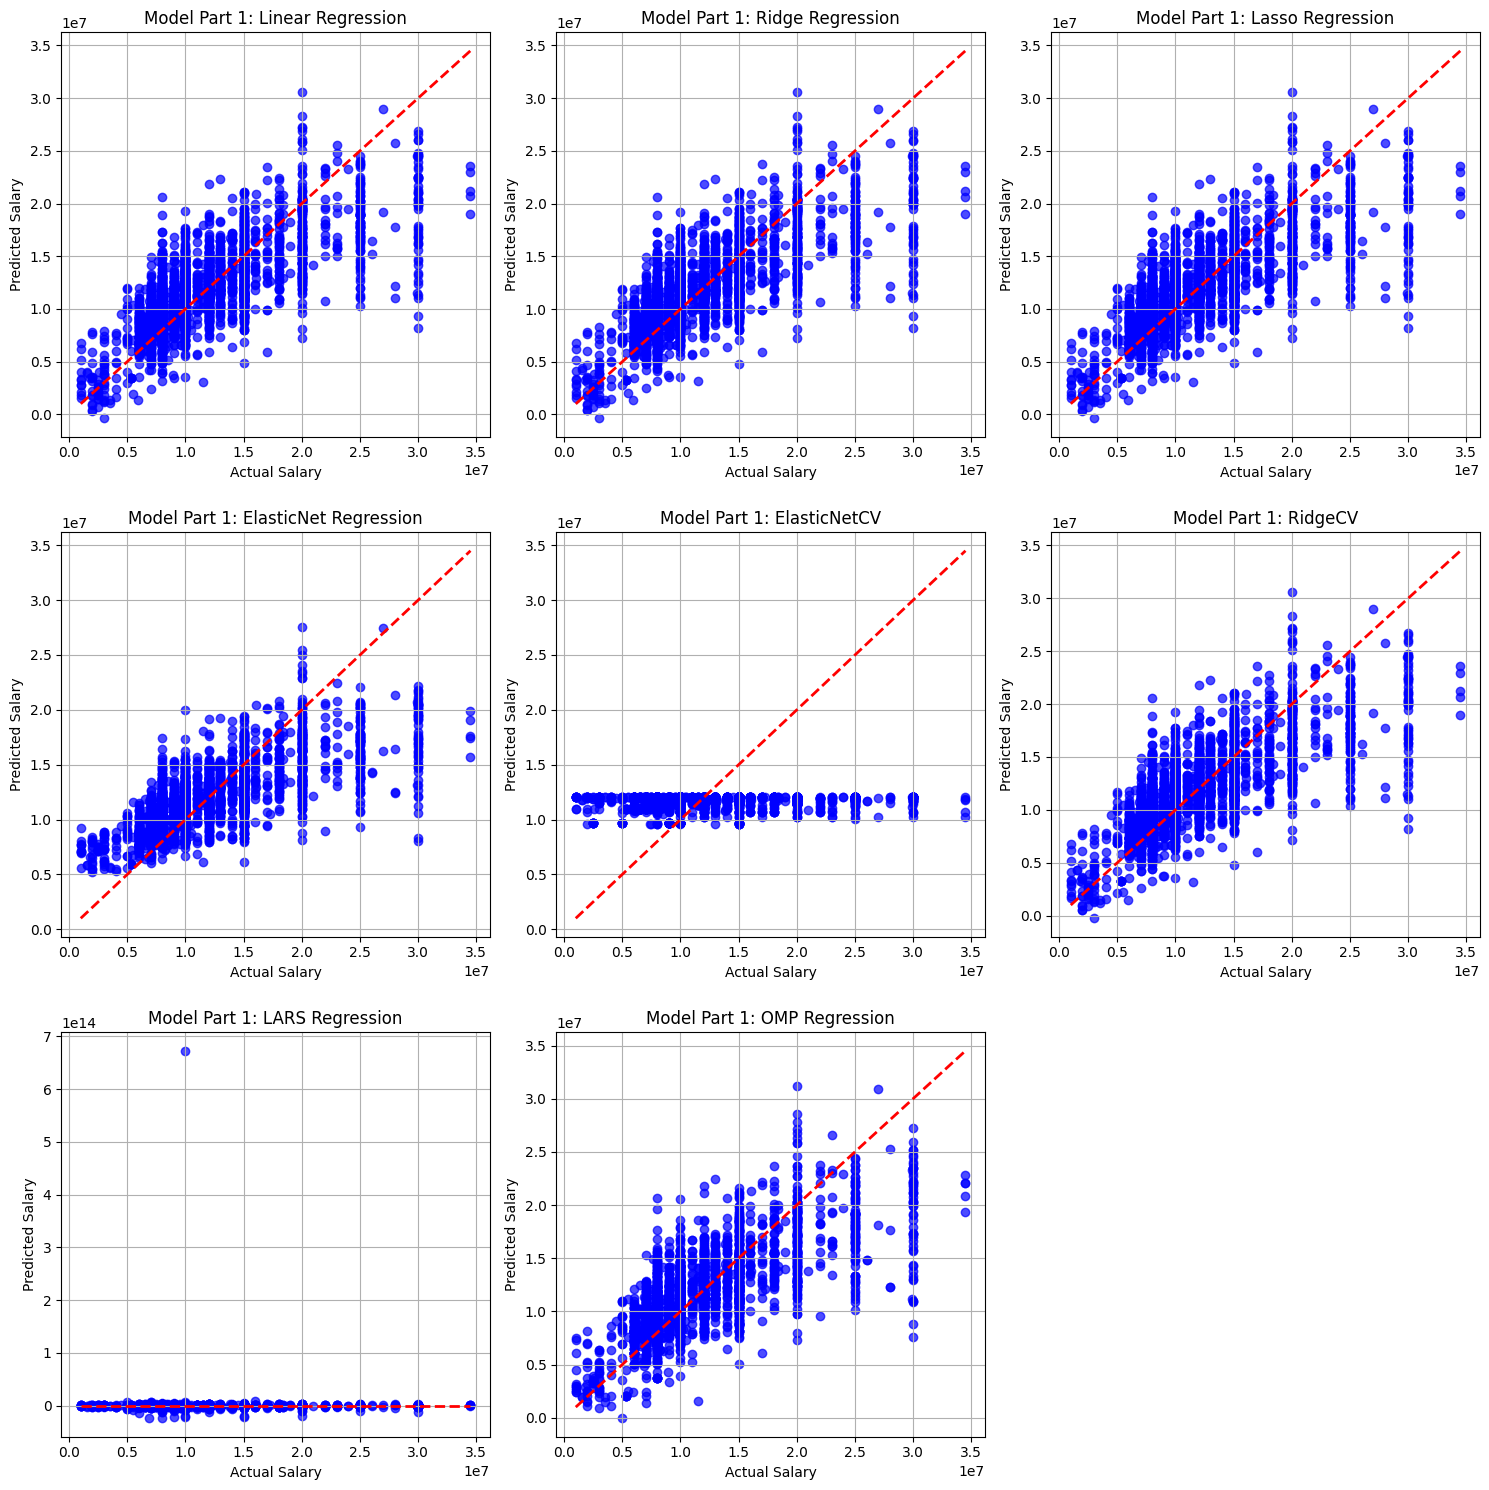

In [13]:
# Hàm vẽ biểu đồ dự đoán so với thực tế
def plot_predictions(models_dict, X_test, y_test, title_prefix="Model"):
    num_models = len(models_dict)
    num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)  # Tính số hàng cần thiết
    
    plt.figure(figsize=(15, 5 * num_rows))  # Tạo một figure với kích thước tùy chỉnh
    
    for i, (model_name, model) in enumerate(models_dict.items()):
        try:
            y_pred = model.predict(X_test)  # Dự đoán trên tập kiểm tra
            plt.subplot(num_rows, 3, i + 1)  # Sắp xếp các biểu đồ thành nhiều hàng (3 biểu đồ mỗi hàng)
            plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # Scatter plot
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Đường tham chiếu y=x
            plt.xlabel("Actual Salary")
            plt.ylabel("Predicted Salary")
            plt.title(f"{title_prefix}: {model_name}")
            plt.grid(True)
        except Exception as e:
            print(f"Error plotting for {model_name}: {e}")

    plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
    plt.show()

# Vẽ biểu đồ cho các mô hình đã huấn luyện
print("Biểu đồ dự đoán cho linear_models:")
plot_predictions(linear_models, X_test, y_test, title_prefix="Model Part 1")

Biểu đồ dự đoán cho non_linear_models:


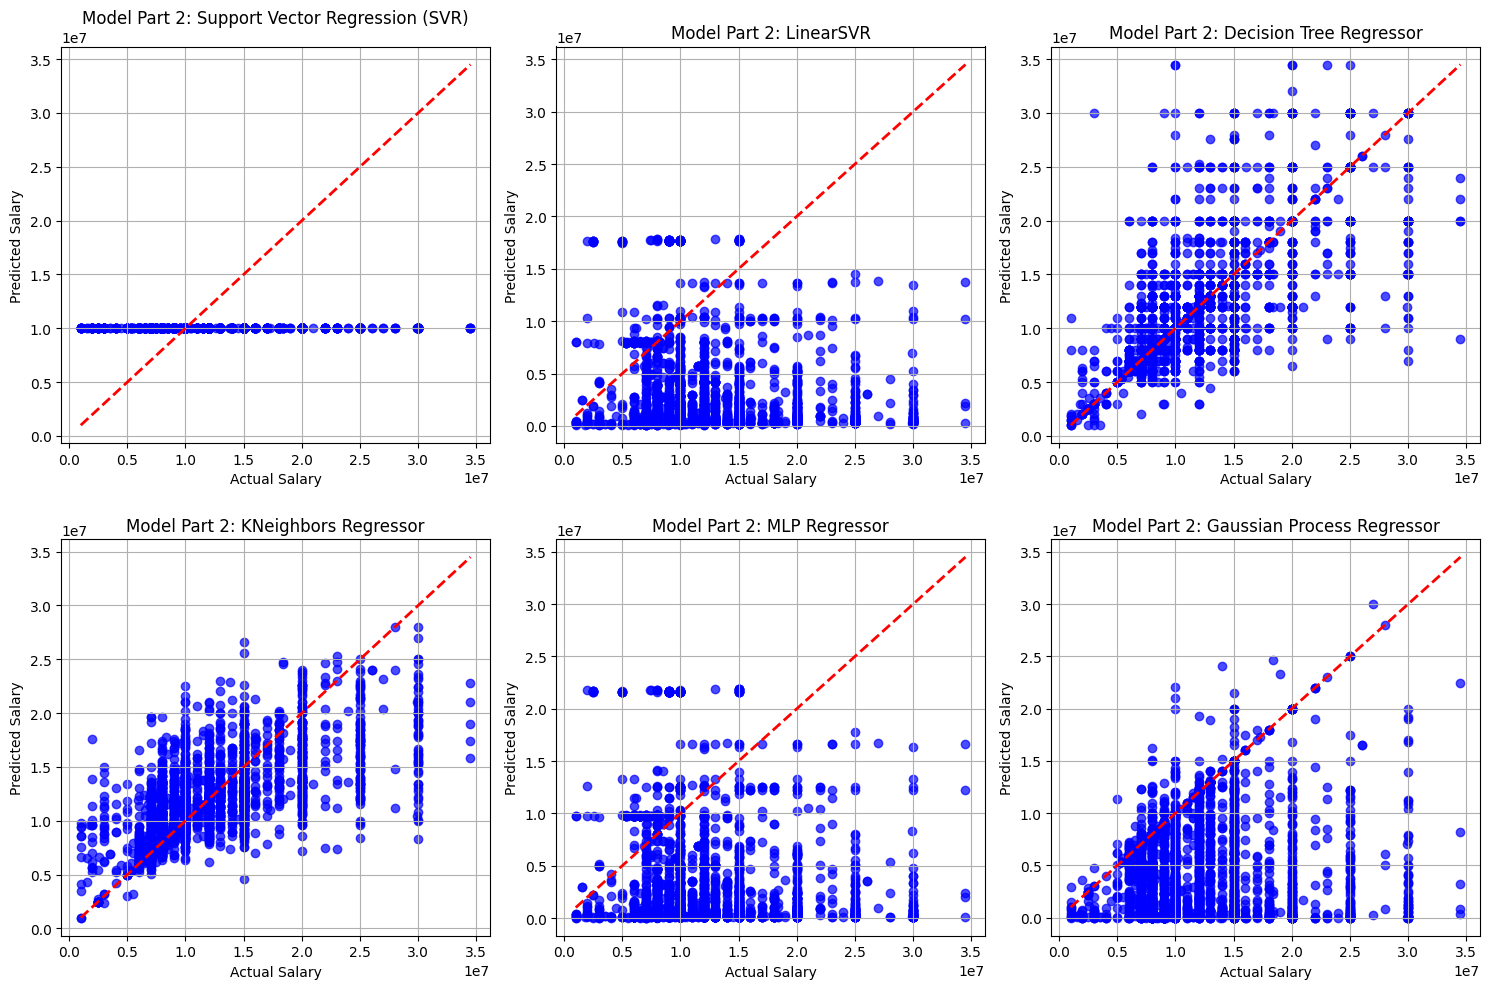

Biểu đồ dự đoán cho tree_models:


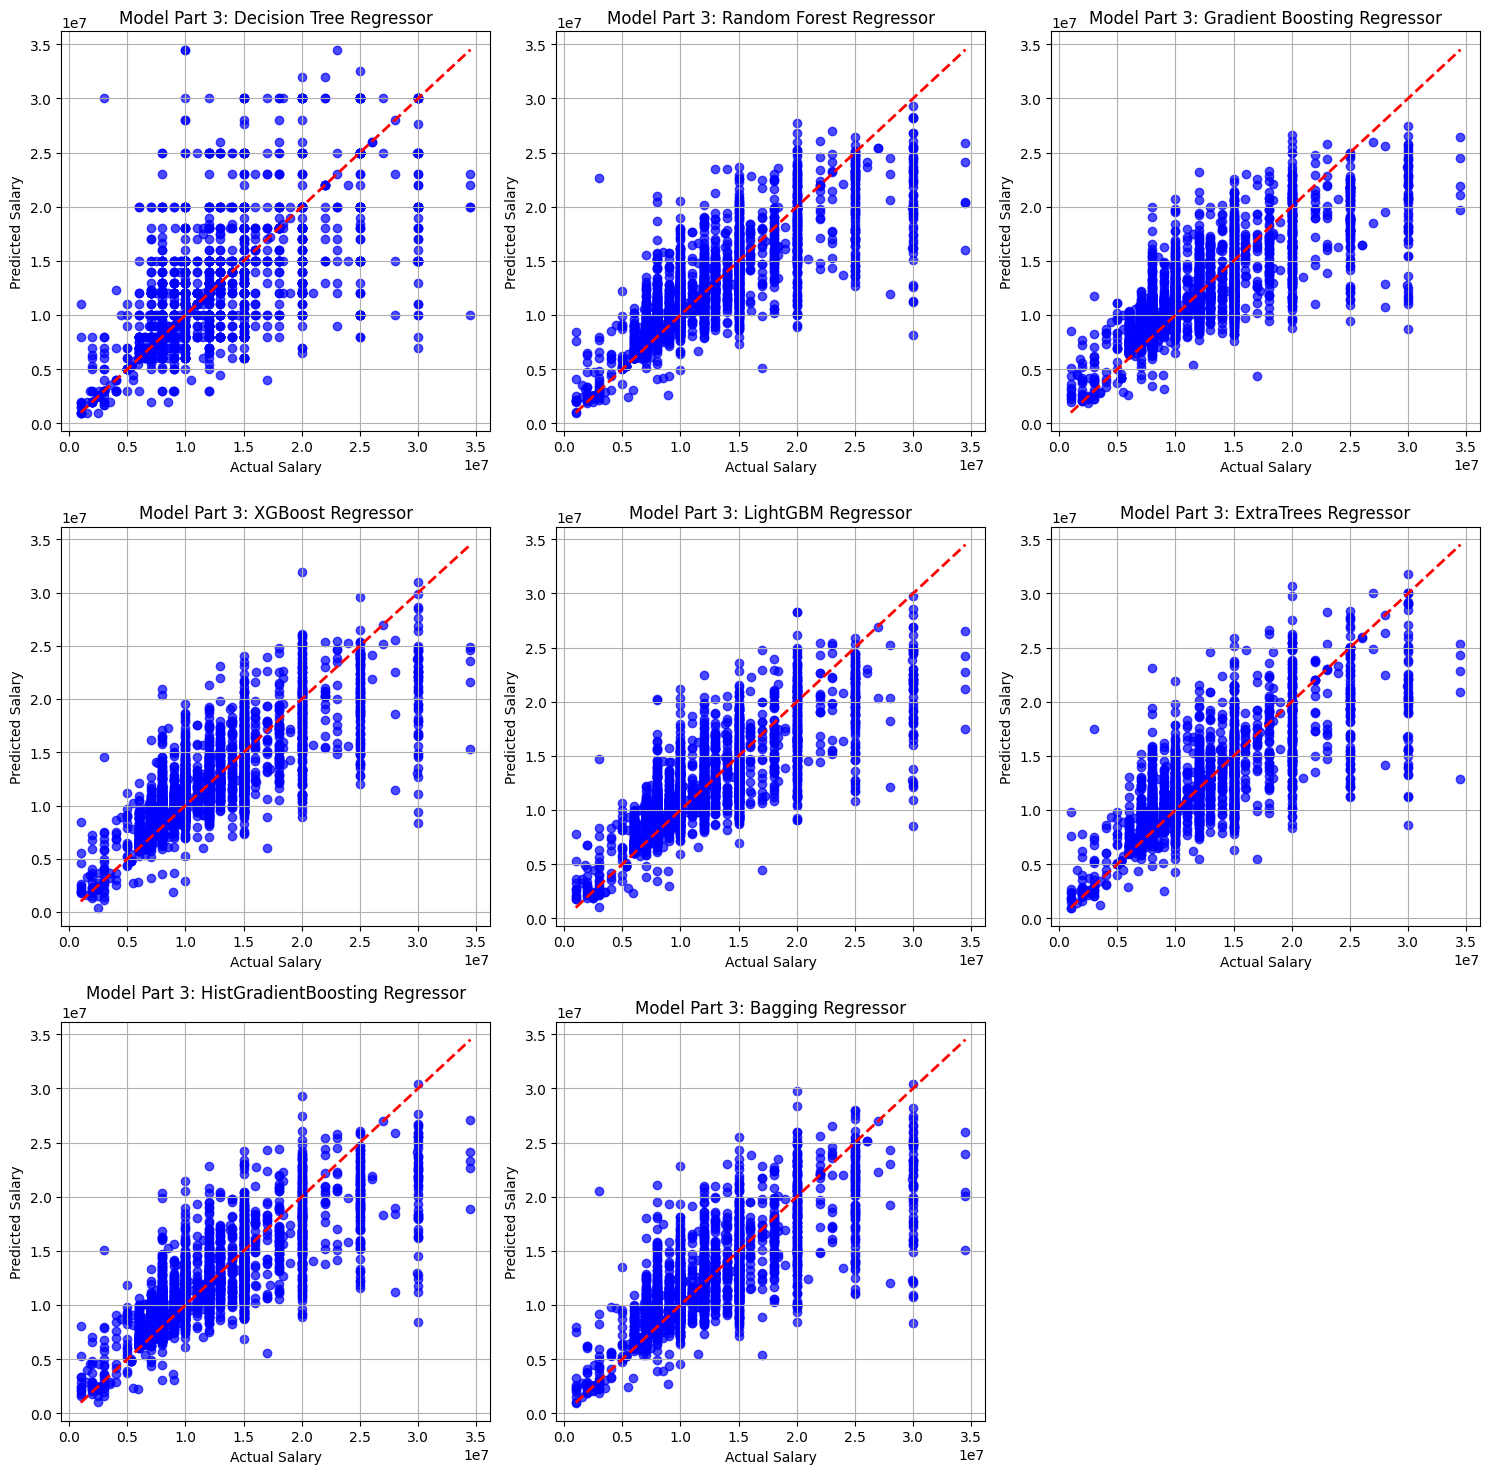

In [14]:
# Vẽ biểu đồ cho model_results_part_2
print("Biểu đồ dự đoán cho non_linear_models:")
plot_predictions(non_linear_models, X_test, y_test, title_prefix="Model Part 2")

# Lặp lại cho các phần còn lại (model_results_part_3 đến model_results_part_10)
print("Biểu đồ dự đoán cho tree_models:")
plot_predictions(tree_models, X_test, y_test, title_prefix="Model Part 3")

Biểu đồ dự đoán cho special models:


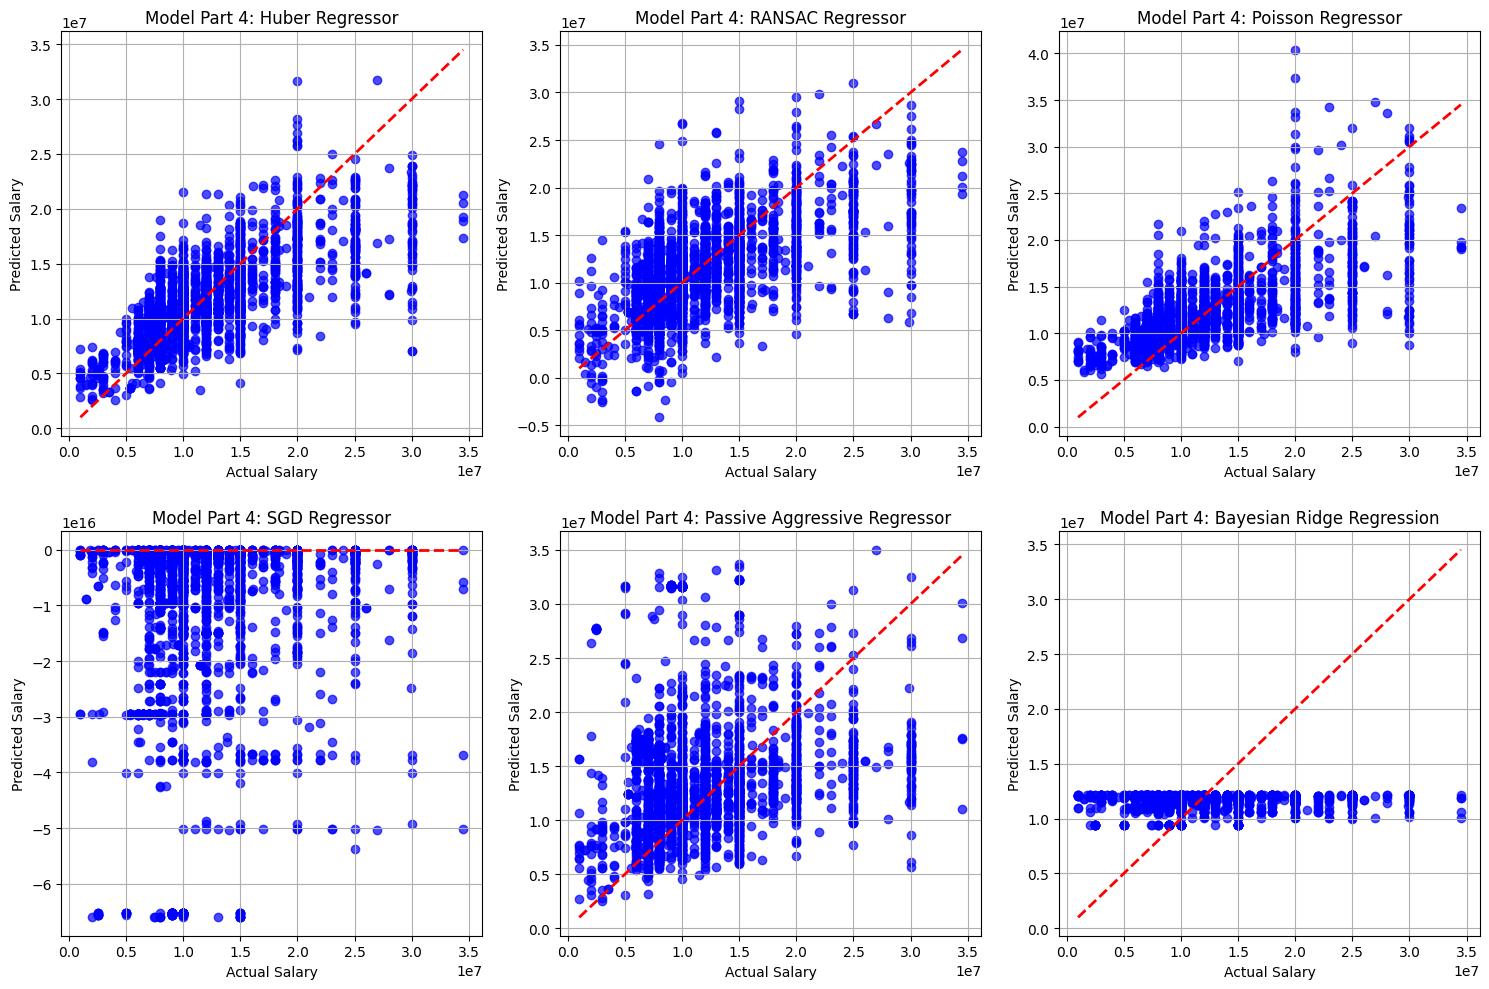

Biểu đồ dự đoán cho ensemble models:


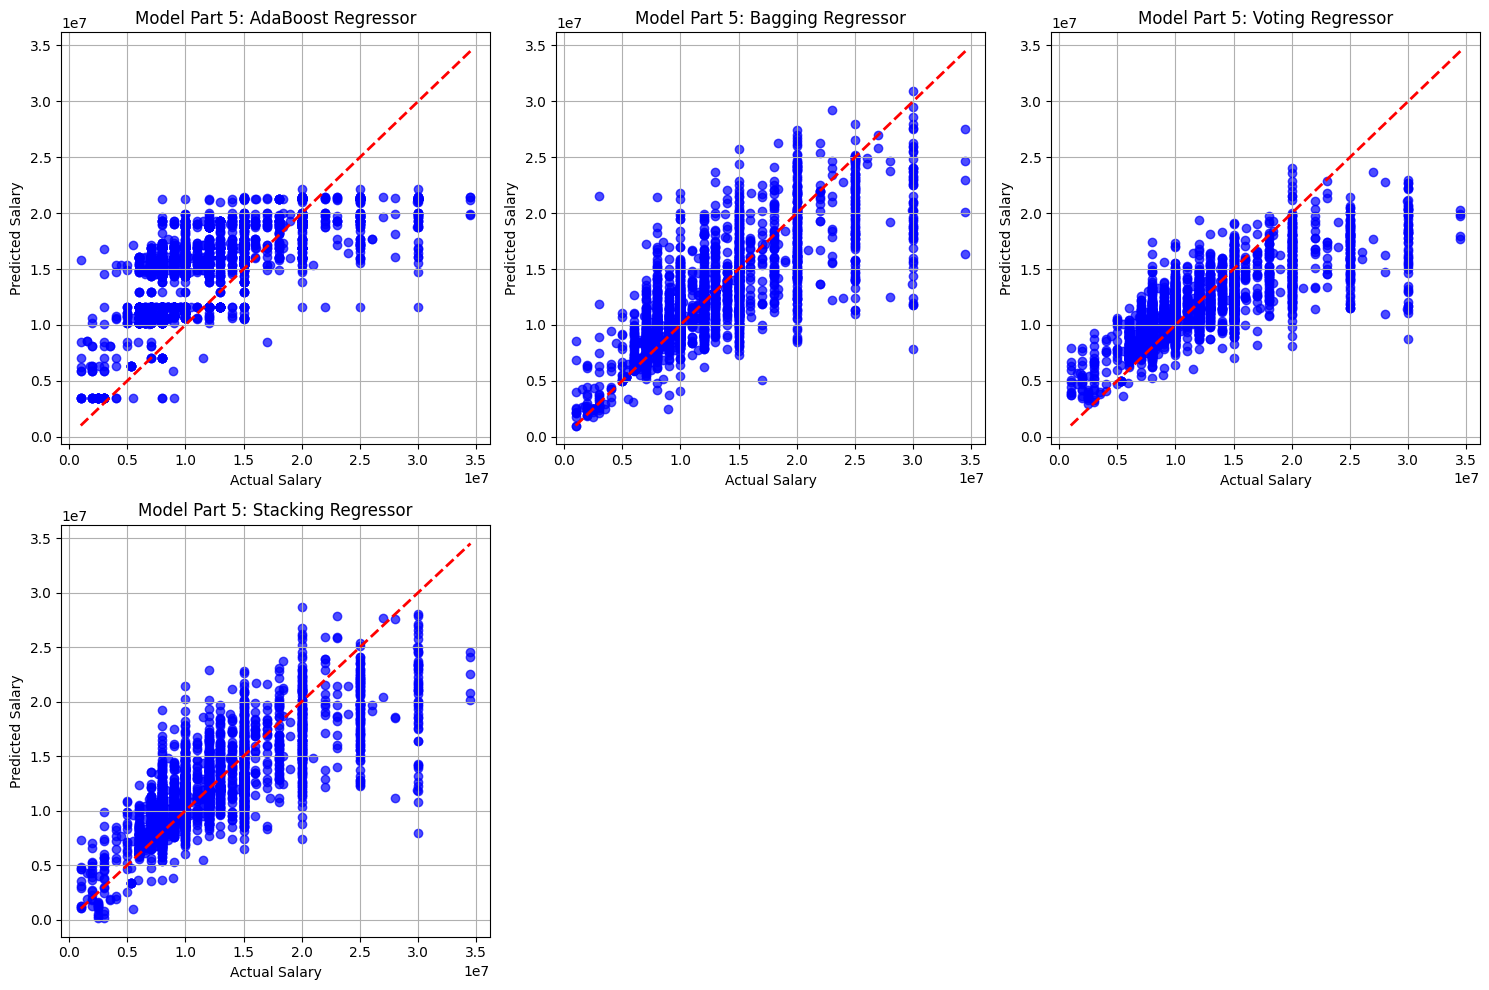

Biểu đồ dự đoán cho clustering models:


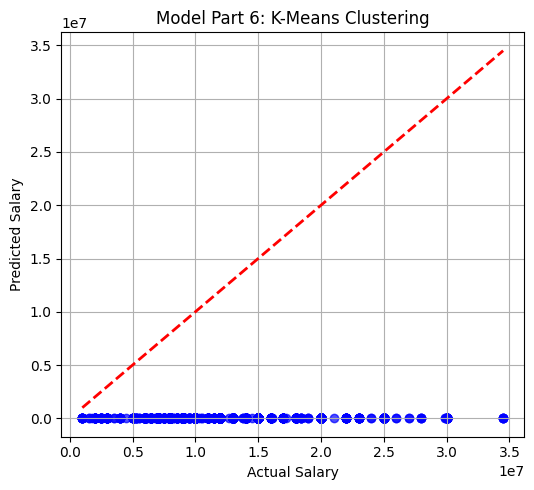

In [15]:
# Đoạn 4
print("Biểu đồ dự đoán cho special models:")
plot_predictions(special_models, X_test, y_test, title_prefix="Model Part 4")

# Đoạn 5
print("Biểu đồ dự đoán cho ensemble models:")
plot_predictions(ensemble_models, X_test, y_test, title_prefix="Model Part 5")

# Đoạn 6
print("Biểu đồ dự đoán cho clustering models:")
plot_predictions(clustering_models, X_test, y_test, title_prefix="Model Part 6")

In [16]:
# # Lấy kết quả từ hàm train_and_evaluate
# for i in range(1, 7):
#     globals()[f"model_results_part_{i}"], _ = train_and_evaluate(globals()[f"models_part_{i}"], X_train, y_train, X_test, y_test)

# Gộp tất cả kết quả vào all_models
all_models = {**model_results_part_1,**model_results_part_2,**model_results_part_3,**model_results_part_4, **model_results_part_5,**model_results_part_6}
# Trích xuất MAE từ tất cả các mô hình
model_names = list(all_models.keys())
mae_values = [all_models[model]["MAE"] for model in model_names]
mse_values = [all_models[model]["MSE"] for model in model_names]
rmse_values = [all_models[model]["RMSE"] for model in model_names]
r2_values = [all_models[model]["R²"] for model in model_names]

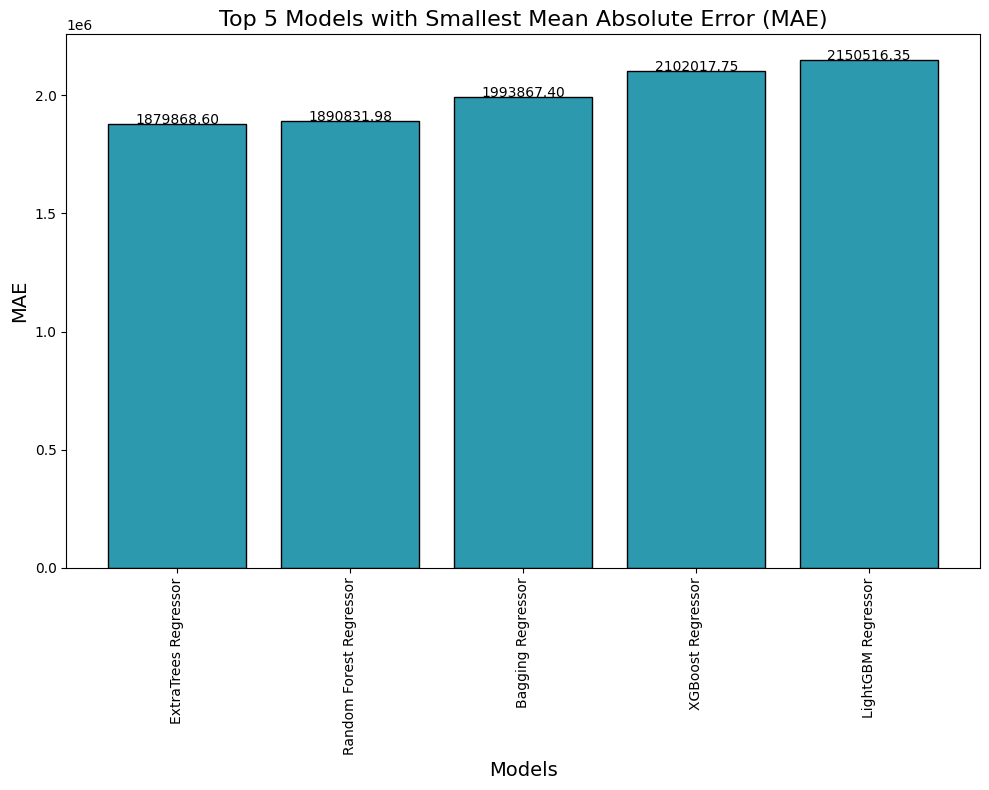

In [17]:
# Chọn 5 mô hình có MAE nhỏ nhất
top_5_models_indices = np.argsort(mae_values)[:5]
top_5_model_names = [model_names[i] for i in top_5_models_indices]
top_5_mae_values = [mae_values[i] for i in top_5_models_indices]

# Vẽ biểu đồ MAE cho 5 mô hình có MAE nhỏ nhất
plt.figure(figsize=(10, 8))  # Giảm kích thước biểu đồ

# Vẽ cột biểu đồ cho 5 mô hình có MAE nhỏ nhất
plt.bar(top_5_model_names, top_5_mae_values, color='#2d99ae', edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Top 5 Models with Smallest Mean Absolute Error (MAE)', fontsize=16)
plt.xticks(rotation =90)
plt.xlabel('Models', fontsize=14)
plt.ylabel('MAE', fontsize=14)

# Hiển thị giá trị MAE trên cột
for i, v in enumerate(top_5_mae_values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
# Chọn 5 mô hình có MSE nhỏ nhất
top_5_models_indices = np.argsort(mse_values)[:5]
top_5_model_names = [model_names[i] for i in top_5_models_indices]
top_5_mse_values = [mse_values[i] for i in top_5_models_indices]

# Vẽ biểu đồ MSE cho 5 mô hình có MSE nhỏ nhất
plt.figure(figsize=(10, 8))  # Giảm kích thước biểu đồ

# Vẽ cột biểu đồ cho 5 mô hình có MSE nhỏ nhất
plt.bar(top_5_model_names, top_5_mse_values, color='#2d99ae', edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Top 5 Models with Smallest MSE', fontsize=16)
plt.xticks(rotation =90)
plt.xlabel('Models', fontsize=14)
plt.ylabel('MSE', fontsize=14)

# Hiển thị giá trị MAE trên cột
for i, v in enumerate(top_5_mse_values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

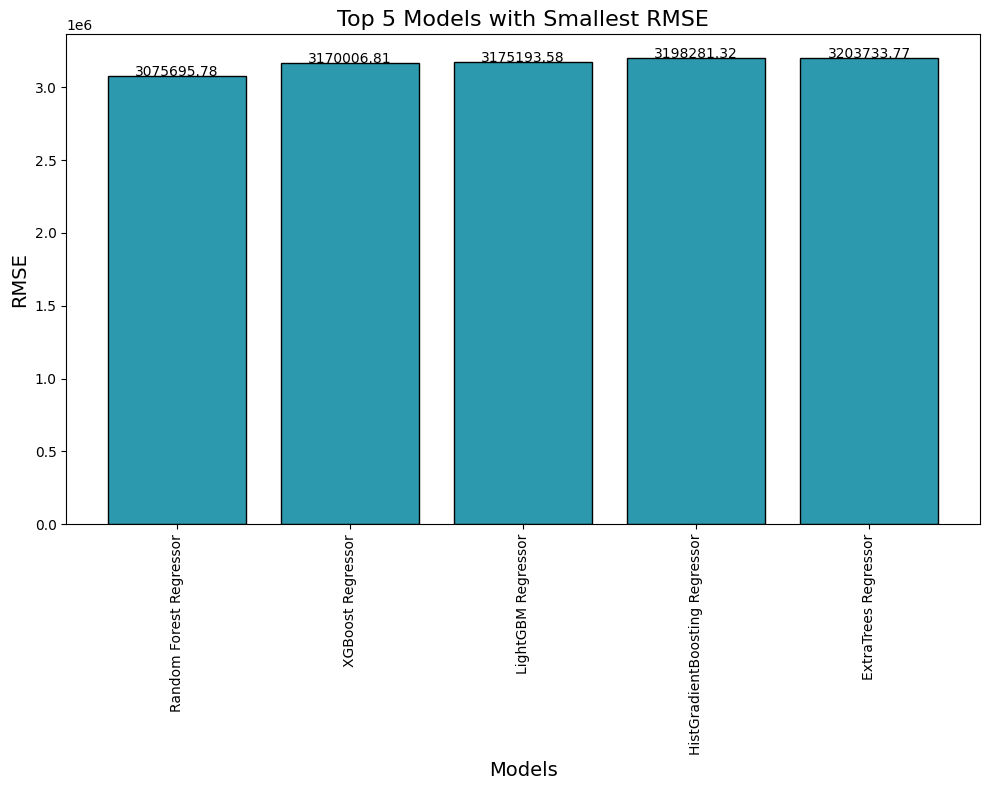

In [18]:
# Chọn 5 mô hình có RMSE nhỏ nhất
top_5_models_indices = np.argsort(rmse_values)[:5]
top_5_model_names = [model_names[i] for i in top_5_models_indices]
top_5_rmse_values = [rmse_values[i] for i in top_5_models_indices]

# Vẽ biểu đồ RMSE cho 5 mô hình có RMSE nhỏ nhất
plt.figure(figsize=(10, 8))  # Giảm kích thước biểu đồ

# Vẽ cột biểu đồ cho 5 mô hình có RMSE nhỏ nhất
plt.bar(top_5_model_names, top_5_rmse_values, color='#2d99ae', edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Top 5 Models with Smallest RMSE', fontsize=16)
plt.xticks(rotation =90)
plt.xlabel('Models', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

# Hiển thị giá trị MAE trên cột
for i, v in enumerate(top_5_rmse_values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

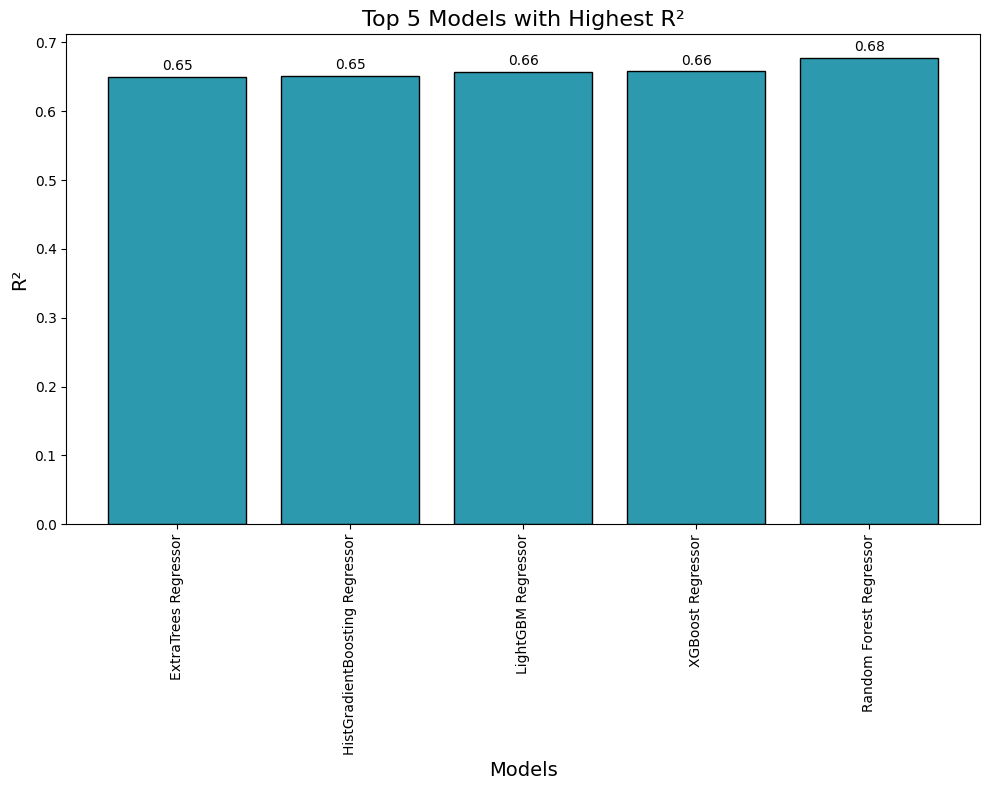

In [19]:
# Lấy chỉ mục của 5 mô hình có R² cao nhất
top_5_models_indices = np.argsort(r2_values)[-5:]  # Lấy 5 chỉ mục cuối cùng (R² cao nhất)
top_5_model_names = [model_names[i] for i in top_5_models_indices]  # Tên mô hình
top_5_r2_values = [r2_values[i] for i in top_5_models_indices]  # Giá trị R² của các mô hình
# Vẽ biểu đồ R² cho 5 mô hình có R² cao nhất
plt.figure(figsize=(10, 8))  # Giảm kích thước biểu đồ
# Vẽ cột biểu đồ cho 5 mô hình có R² cao nhất
plt.bar(top_5_model_names, top_5_r2_values, color='#2d99ae', edgecolor='black')
# Thêm tiêu đề và nhãn
plt.title('Top 5 Models with Highest R²', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Models', fontsize=14)
plt.ylabel('R²', fontsize=14)
# Hiển thị giá trị R² trên cột
for i, v in enumerate(top_5_r2_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [20]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí
html_content = """
<h2 style="text-align: left; color: #2a9d8f; font-size: 28px; font-weight: bold;">📊 Bước 3: Đánh giá bằng các thông số 📊</h2>
<p style="text-align: left; font-size: 18px; color: #1d3557;">Sử dụng các thông số đánh giá để phân tích kết quả của các mô hình và lựa chọn mô hình tốt nhất.</p>
"""

# Hiển thị HTML
display(HTML(html_content))


In [21]:
html_step3 = """
<h3 id="step3" style="text-align: left; color: #e76f51; font-size: 24px; font-weight: bold;">1. Chọn model tốt nhất dựa trên từng thông số riêng lẻ:</h3>
<p style="text-align: left; font-size: 16px; color: #1d3557;">Phân tích và lựa chọn mô hình tốt nhất dựa trên các thông số đánh giá như độ chính xác, độ lệch, v.v.</p>
"""
display(HTML(html_step3))

In [32]:
# Tìm mô hình tốt nhất dựa trên MAE, RMSE và R²
best_mae_model = min(all_models, key=lambda model: all_models[model]["MAE"])
best_mse_model = min(all_models, key=lambda model: all_models[model]["MSE"])
best_rmse_model = min(all_models, key=lambda model: all_models[model]["RMSE"])
best_r2_model = max(all_models, key=lambda model: all_models[model]["R²"])

# In kết quả
print(f"Mô hình có MAE thấp nhất: {best_mae_model} với MAE = {all_models[best_mae_model]['MAE']}")
print(f"Mô hình có MSE thấp nhất: {best_mse_model} với MSE = {all_models[best_mse_model]['MSE']}")
print(f"Mô hình có RMSE thấp nhất: {best_rmse_model} với RMSE = {all_models[best_rmse_model]['RMSE']}")
print(f"Mô hình có R² cao nhất: {best_r2_model} với R² = {all_models[best_r2_model]['R²']}")

Mô hình có MAE thấp nhất: ExtraTrees Regressor với MAE = 1879868.6002737056
Mô hình có MSE thấp nhất: Random Forest Regressor với MSE = 9459904534259.79
Mô hình có RMSE thấp nhất: Random Forest Regressor với RMSE = 3075695.7805120763
Mô hình có R² cao nhất: Random Forest Regressor với R² = 0.6777814094246326


In [23]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí
html_content = """
<h3 style="text-align: left; color: #457b9d; font-size: 24px; font-weight: bold;">2. Chọn model tốt nhất dựa trên kết hợp 3 thông số:</h3>
<p style="text-align: left; font-size: 16px; color: #1d3557;">Lựa chọn mô hình tốt nhất dựa trên sự kết hợp của ba thông số quan trọng để có cái nhìn tổng thể hơn về hiệu quả của mô hình.</p>
"""

# Hiển thị HTML
display(HTML(html_content))

In [31]:
# Định nghĩa trọng số cho các chỉ số
w1 = 0.25  # Trọng số cho MAE
w2 = 0.25  # Trọng số cho RMSE
w3 = 0.25  # Trọng số cho MSE
w4 = 0.25  # Trọng số cho R²

# Tính MAE min, RMSE min, MSE min, và R² min/max từ tất cả các mô hình
mae_min = min(all_models[model]["MAE"] for model in all_models)
mae_max = max(all_models[model]["MAE"] for model in all_models)

rmse_min = min(all_models[model]["RMSE"] for model in all_models)
rmse_max = max(all_models[model]["RMSE"] for model in all_models)

mse_min = min(all_models[model]["MSE"] for model in all_models)
mse_max = max(all_models[model]["MSE"] for model in all_models)

r2_min = min(all_models[model]["R²"] for model in all_models)  # R² càng cao càng tốt
r2_max = max(all_models[model]["R²"] for model in all_models)

# Tính chỉ số tổng hợp cho mỗi mô hình
model_scores = {}
for model in all_models:
    # Chuẩn hóa các chỉ số
    normalized_mae = (all_models[model]["MAE"] - mae_min) / (mae_max - mae_min)
    normalized_rmse = (all_models[model]["RMSE"] - rmse_min) / (rmse_max - rmse_min)
    normalized_mse = (all_models[model]["MSE"] - mse_min) / (mse_max - mse_min)
    normalized_r2 = (all_models[model]["R²"] - r2_min) / (r2_max - r2_min)

    # Tính điểm tổng hợp theo trọng số
    score = (
        w1 * (1 - normalized_mae) +  # MAE nhỏ hơn là tốt hơn
        w2 * (1 - normalized_rmse) +  # RMSE nhỏ hơn là tốt hơn
        w3 * (1 - normalized_mse) +  # MSE nhỏ hơn là tốt hơn
        w4 * normalized_r2           # R² lớn hơn là tốt hơn
    )
    model_scores[model] = score

# Chọn mô hình tốt nhất (mô hình có score cao nhất)
best_model = max(model_scores, key=model_scores.get)

# In kết quả
print(f"Mô hình tốt nhất là: {best_model} với chỉ số tổng hợp = {model_scores[best_model]}")


Mô hình tốt nhất là: Random Forest Regressor với chỉ số tổng hợp = 0.9999999999997367


In [33]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí
html_content = """
<h3 style="text-align: left; color: red; font-size: 24px; font-weight: bold;">🔴 Kết luận: </h3>
<p style="text-align: left; font-size: 16px; color: #1d3557;">Từ thực tế biểu đồ dự đoán và đánh giá bằng công thức, ta nhận thấy các models tối ưu là: <strong>ExtraTrees Regressor và Random Forest Regressor </strong> 🚀.</p>
"""

# Hiển thị HTML
display(HTML(html_content))

In [26]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí
html_content = """
<h2 style="text-align: left; color: #2a9d8f; font-size: 28px; font-weight: bold;">⚙️ Bước 4: Tối ưu hóa cho model phù hợp nhất 📈</h2>
<p style="text-align: left; font-size: 18px; color: #1d3557;"> Tiến hành tối ưu hóa các tham số và cấu hình của mô hình để đạt được hiệu suất tối ưu nhất.</p>
"""

# Hiển thị HTML
display(HTML(html_content))


In [27]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí
html_content = """
<h3 style="text-align: left; color: #e76f51; font-size: 24px; font-weight: bold;">1. Tối ưu hóa tham số 🔧⚙️🛠️</h3>
<p style="text-align: left; font-size: 16px; color: #1d3557;">Tiến hành tối ưu hóa các tham số của mô hình để nâng cao hiệu suất và độ chính xác của dự đoán.</p>
"""

# Hiển thị HTML
display(HTML(html_content))


In [37]:
def train_and_evaluate_optimized(models_dict, X_train, y_train, X_test, y_test):
    results = {}
    trained_models = {}  # Lưu mô hình đã huấn luyện
    for model_name, model_info in models_dict.items():
        try:
            # Sử dụng RepeatedKFold cho việc chia dữ liệu
            rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
            grid_search = RandomizedSearchCV(
                estimator=model_info["model"],
                param_distributions=model_info["params"],
                n_iter=100,
                cv=rkf,  # Thay vì cv=5
                scoring="neg_mean_absolute_error",
                verbose=1,
                n_jobs=-1,
                random_state=42
            )
            grid_search.fit(X_train, y_train)  # Huấn luyện mô hình
            best_model = grid_search.best_estimator_  # Lấy mô hình tốt nhất từ grid search
            
            # Dự đoán với mô hình tốt nhất
            y_pred = best_model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            
            # Lưu kết quả và mô hình
            results[model_name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}
            trained_models[model_name] = best_model  # Lưu mô hình đã huấn luyện
            
            print(f"{model_name}: MAE={mae}, MSE={mse}, RMSE={rmse}, R²={r2}")
        except Exception as e:
            print(f"Error in {model_name}: {e}")
    
    return results, trained_models

models_selected_1 = {
    "ExtraTrees Regressor": {
        "model": ExtraTreesRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],  # Tăng số lượng cây
            "max_depth": [10, 20, 30, 40, None],  # Thêm độ sâu lớn hơn
            "min_samples_split": [2, 5, 10, 15],  # Mở rộng dải
            "min_samples_leaf": [1, 2, 4, 6],  # Chi tiết hơn
            "max_features": ["sqrt", "log2", None],  # Giữ nguyên các chiến lược
            "bootstrap": [True, False]
        }
    }
}
models_selected_2 = {
    "Random Forest Regressor": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],  # Tăng số lượng cây
            "max_depth": [10, 20, 30, 40, None],  # Thêm độ sâu lớn hơn
            "min_samples_split": [2, 5, 10, 15],  # Mở rộng dải
            "min_samples_leaf": [1, 2, 4, 6],  # Chi tiết hơn
            "max_features": ["sqrt", "log2", None],  # Giữ nguyên
            "bootstrap": [True, False]
        }
    }
}

model_results_1, trained_models_1 = train_and_evaluate_optimized(models_selected_1, X_train, y_train, X_test, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
ExtraTrees Regressor: MAE=1886722.1763000526, MSE=9348902079900.842, RMSE=3057597.4358801455, R²=0.6815623201372527


In [38]:
model_results_2, trained_models_2 = train_and_evaluate_optimized(models_selected_2, X_train, y_train, X_test, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Random Forest Regressor: MAE=1891990.6214688902, MSE=9155949427735.932, RMSE=3025879.942716818, R²=0.6881345779653515


In [39]:
from IPython.display import display, HTML

# HTML và Markdown được trang trí
html_content = """
<h3 style="text-align: left; color: #457b9d; font-size: 24px; font-weight: bold;">2. Vẽ biểu đồ dự đoán 📊🔍📈</h3>
<p style="text-align: left; font-size: 16px; color: #1d3557;">Vẽ biểu đồ để trực quan hóa kết quả dự đoán và phân tích sự chính xác của mô hình.</p>
"""
# Hiển thị HTML
display(HTML(html_content))

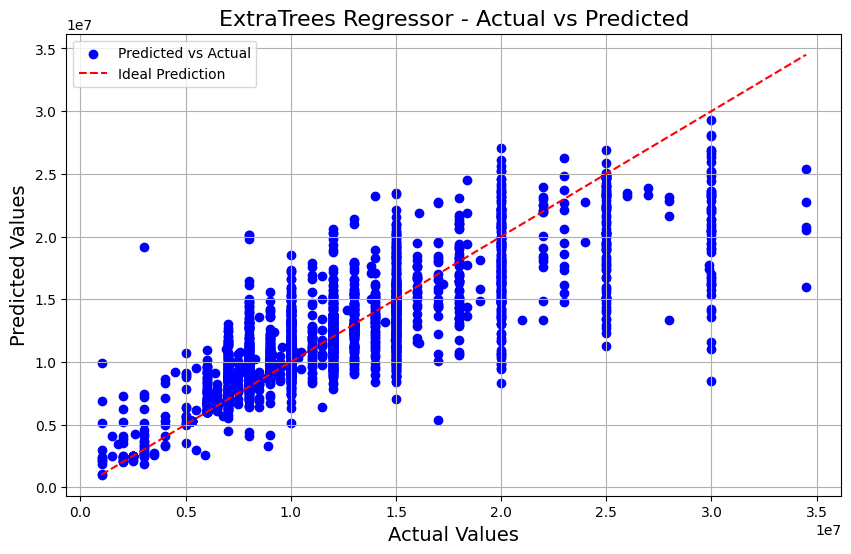

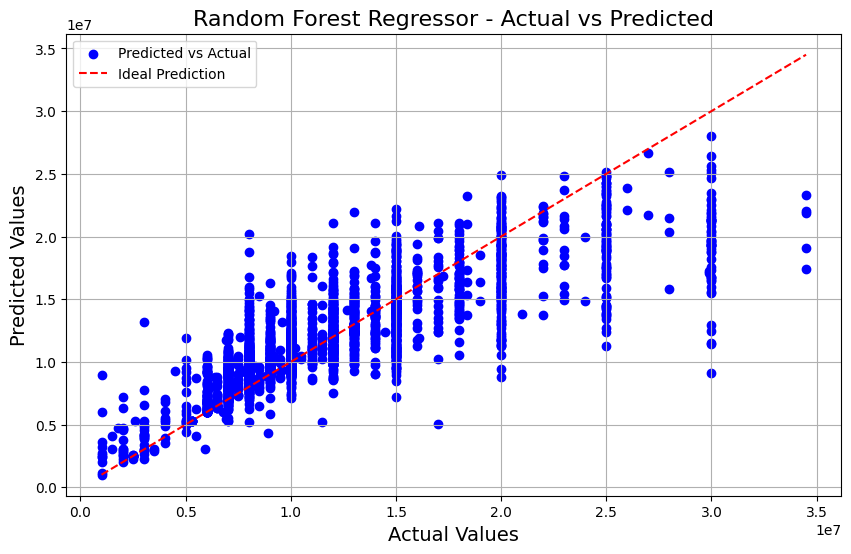

In [43]:
def plot_predictions_optimized(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    
    # Vẽ đồ thị
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
    
    # Thêm nhãn và tiêu đề
    plt.title(f"{model_name} - Actual vs Predicted", fontsize=16)
    plt.xlabel("Actual Values", fontsize=14)
    plt.ylabel("Predicted Values", fontsize=14)
    
    # Hiển thị đường chéo (ideal prediction line)
    plt.legend()
    plt.grid(True)
    plt.show()
# Lấy mô hình tốt nhất từ trained_models
best_model_1 = trained_models_1["ExtraTrees Regressor"]
# Dự đoán với mô hình tốt nhất
y_pred = best_model_1.predict(X_test)
# Vẽ biểu đồ
plot_predictions_optimized(y_test, y_pred, "ExtraTrees Regressor")

best_model_2 = trained_models_2["Random Forest Regressor"]
# Dự đoán với mô hình tốt nhất
y_pred = best_model_2.predict(X_test)
# Vẽ biểu đồ
plot_predictions_optimized(y_test, y_pred, "Random Forest Regressor")
